# Start of Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [11]:
merged_df = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Scripts/models/Linear Regression/Data_USA/merged_df.csv')
merged_df.head()

,GDP,Year,M1,GDP Change,Oil_Price,CPI
0,542.382,1960,140.3,3.97351,1.63,1.457976
1,562.210,1961,143.1,3.65563,1.57,1.070724
2,603.922,1962,146.5,7.41925,1.52,1.198773
3,637.452,1963,151.0,5.55205,1.50,1.239669
4,684.462,1964,156.8,7.37468,1.45,1.278912


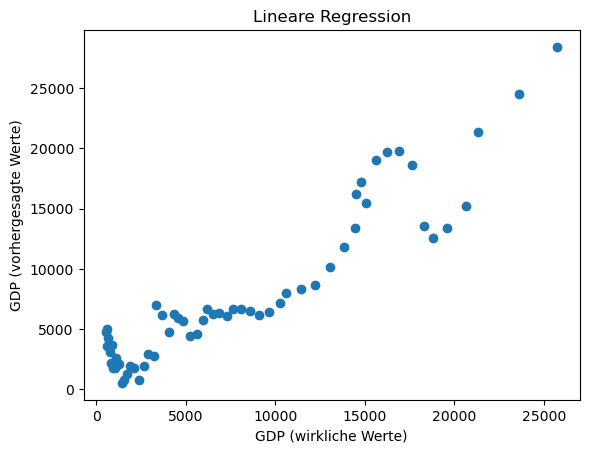

In [6]:
y = merged_df['GDP']
X = merged_df.drop(columns=['GDP', 'Year'])

# Trainieren des linearen Regressionsmodells
model = LinearRegression()
model.fit(X, y)

# Generiere Vorhersagen
X_new = np.array([[0], [2]])  # Beispielsweise
y_pred = model.predict(X)

# Visualisierung der Daten und der Regressionsgeraden
plt.scatter(y, y_pred)
plt.xlabel("GDP (wirkliche Werte)")
plt.ylabel("GDP (vorhergesagte Werte)")
plt.title("Lineare Regression")
plt.show()

In [7]:
# Bestimmen der Metriken
r_squared = model.score(X, y)
intercept = model.intercept_
slope = model.coef_

print("R² Score:", r_squared)
print("Intercept:", intercept)
print("Slope:", slope)

R² Score: 0.8696110955080677
Intercept: 6436.868670374004
Slope: [   0.76813538 -356.67233876  126.04934695 -382.03266672]


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Vorhersagen basierend auf den trainierten Modell
y_pred = model.predict(X)

# Berechnen der Metriken
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1981.9240878149367
Mean Squared Error (MSE): 6253271.1658752365
Root Mean Squared Error (RMSE): 2500.6541475932327


## Statsmodel package

In [12]:
import statsmodels.api as sm
y = merged_df['GDP']
X = merged_df.drop(columns=['GDP', 'Year', 'GDP Change'])
X = sm.add_constant(X)

# Durchführen der linearen Regression
model = sm.OLS(y, X)
results = model.fit()

# Ausgabe der Regressionsergebnisse
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           4.37e-24
Time:                        12:44:57   Log-Likelihood:                -566.56
No. Observations:                  61   AIC:                             1141.
Df Residuals:                      57   BIC:                             1150.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4652.6308    717.824      6.482      0.0

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Berechnung der VIFs
vif_data = X.copy()  # Kopie der unabhängigen Variablen
vif_data = vif_data.drop(columns=['const'])  # Entfernen der Konstante
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Ausgabe der VIFs
print(vif)


    Variable       VIF
0         M1  1.590580
1  Oil_Price  1.937647
2        CPI  1.398817


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((36, 4), (36,), (25, 4), (25,))